In [72]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data1 = pd.read_csv('C:/Ashwini/tmdb-box-office-prediction/train.csv', sep=",")

In [74]:
data2 = pd.read_csv('C:/Ashwini/tmdb-box-office-prediction/test.csv', sep=",")

In [75]:
data = pd.concat([data1, data2],axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [38]:
#parseAsDates = ['release_date']
#data = pd.read_csv('C:/Ashwini/tmdb-box-office-prediction/train.csv', sep=",", parse_dates=parseAsDates)

In [76]:
data

,Keywords,belongs_to_collection,budget,cast,crew,genres,homepage,id,imdb_id,original_language,...,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...","[{'id': 35, 'name': 'Comedy'}]",NaN,1,tt2637294,en,...,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,12314651.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,2,tt0368933,en,...,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,95149435.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",NaN,3300000,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...","[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,3,tt2582802,en,...,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,13092000.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",NaN,1200000,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,4,tt1821480,hi,...,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,16000000.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani
4,NaN,NaN,0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...","[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,5,tt1380152,ko,...,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,3923970.0,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy
5,NaN,NaN,8000000,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...","[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,6,tt0093743,en,...,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,NaN,NaN,8/6/87,3261638.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night
6,NaN,NaN,14000000,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...","[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,7,tt0431021,en,...,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,"[{'name': 'Ghost House Pictures', 'id': 768}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",8/30/12,85446075.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession
7,"[{'id': 917, 'name': 'journalism'}, {'id': 163...",NaN,0,"[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...","[{'id': 99, 'name': 'Documentary'}]",NaN,8,tt0391024,en,...,/83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg,NaN,NaN,1/15/04,2586511.0,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room
8,"[{'id': 2041, 'name': 'island'}, {'id'

In [77]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d


In [78]:
data['category'] = data['genres'].map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))


In [79]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from os import path
from PIL import Image
from nltk.corpus import stopwords



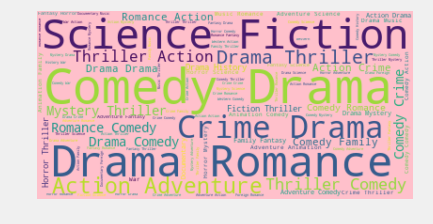

In [80]:
cloud = word = " ".join(a for a in data['category'])
stop_w= set(STOPWORDS)
wordcloud = WordCloud(stopwords=stop_w, background_color="pink").generate(cloud)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [81]:
Num=data.groupby(data['category'].str.lower())['category'].count().sort_values(ascending=False).reset_index(name='Count')[:10]
Num

,category,Count
0,drama,614
1,comedy,477
2,"drama,romance",329
3,"comedy,drama",301
4,"comedy,drama,romance",277
5,"comedy,romance",246
6,"horror,thriller",138
7,documentary,130
8,"drama,thriller",124
9,"crime,drama,thriller",123


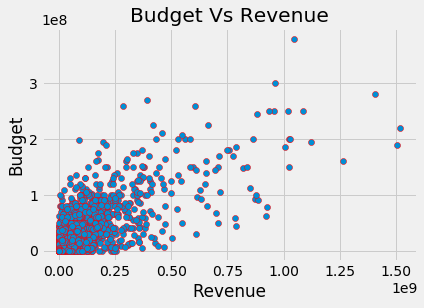

In [82]:
revenue = data['revenue']
budget = data['budget']
plt.scatter(revenue, budget, edgecolors='r')
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.title('Budget Vs Revenue')
plt.show()

In [84]:
data['production'] = data['production_countries'].map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))


In [86]:
Num=data.groupby(data['production'].str.lower())['production'].count().sort_values(ascending=False).reset_index(name='Count')[:10]
Num

,production,Count
0,united states of america,4339
1,"united kingdom,united states of america",286
2,united kingdom,205
3,india,183
4,,157
5,"germany,united states of america",133
6,"canada,united states of america",128
7,france,117
8,russia,106
9,japan,77


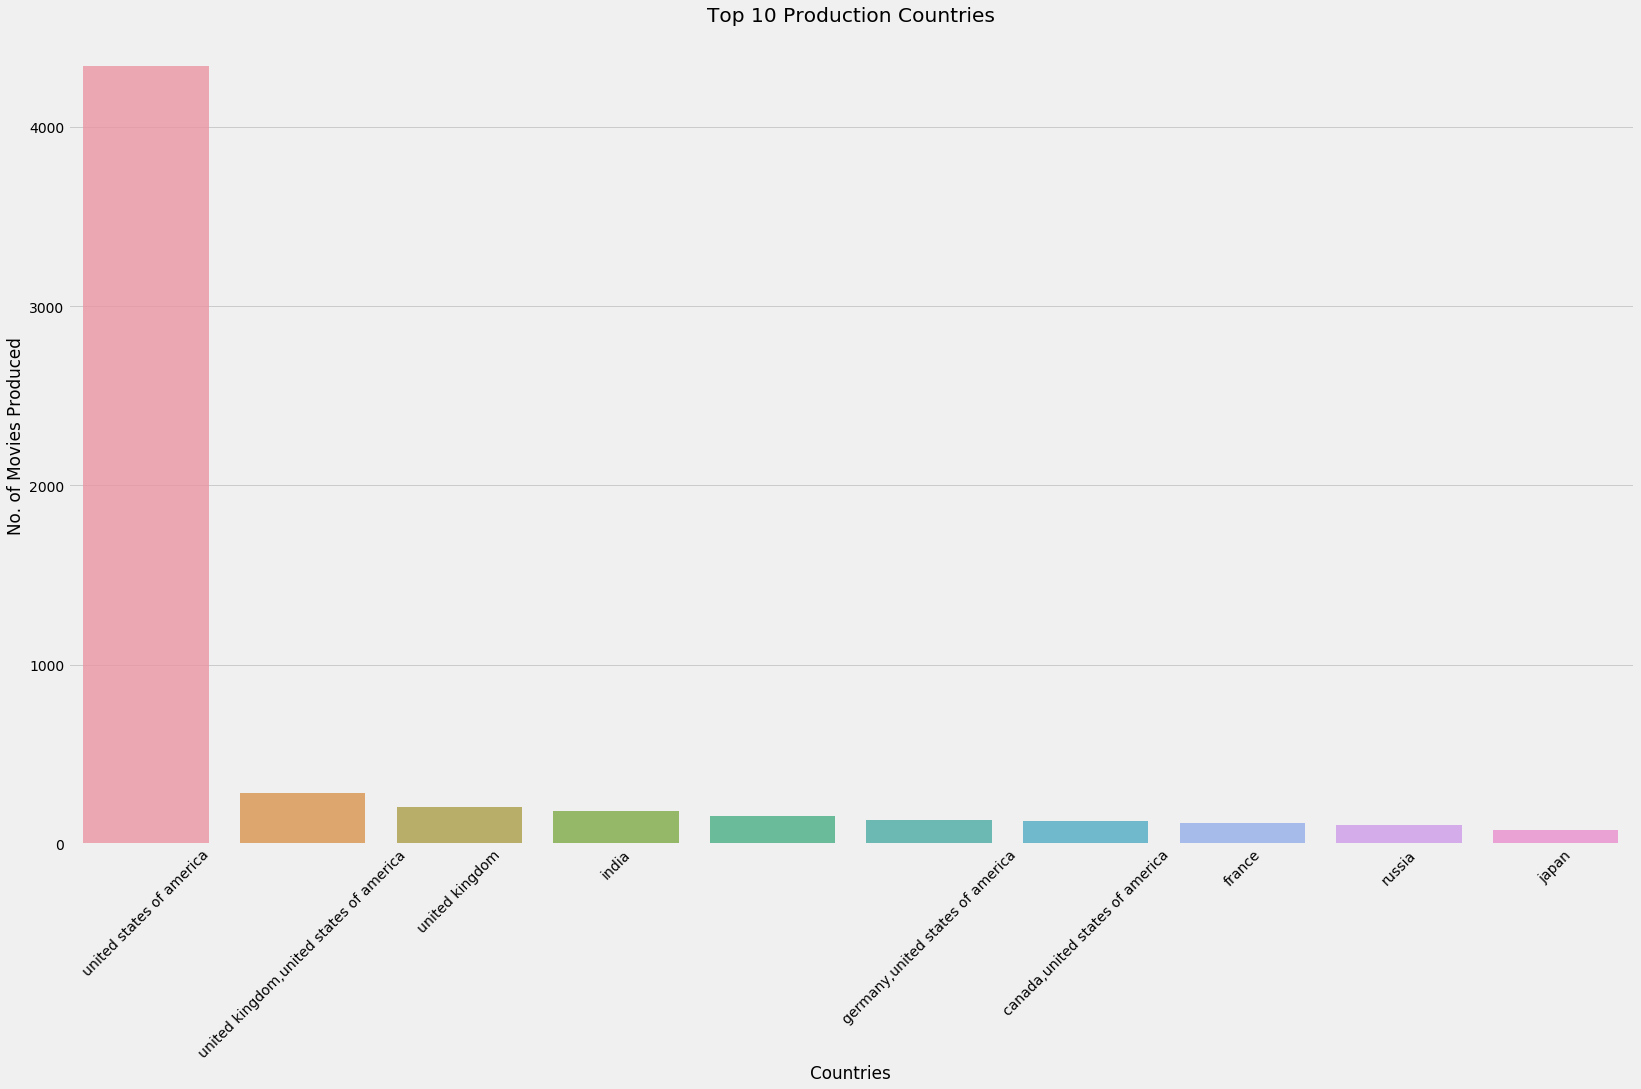

In [87]:
plt.figure(figsize=(25,14))
#x=x.iloc[0:20]
ay=sns.barplot(Num.production,Num.Count, alpha=0.8)
plt.title("Top 10 Production Countries")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.xlabel('Countries')
plt.ylabel('No. of Movies Produced')
plt.show()

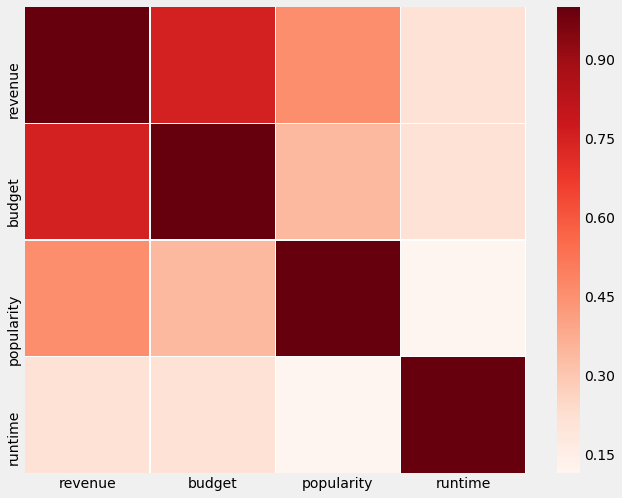

In [88]:
col = ['revenue','budget','popularity','runtime']

plt.subplots(figsize=(10, 8))

corr = data[col].corr()

sns.heatmap(corr, xticklabels=col,yticklabels=col, linewidths=.5, cmap="Reds")
